In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [2]:
quality = read.csv('data/quality.csv.xz')

In [3]:
str(quality)

'data.frame':	131 obs. of  14 variables:
 $ MemberID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InpatientDays       : int  0 1 0 0 8 2 16 2 2 4 ...
 $ ERVisits            : int  0 1 0 1 2 0 1 0 1 2 ...
 $ OfficeVisits        : int  18 6 5 19 19 9 8 8 4 0 ...
 $ Narcotics           : int  1 1 3 0 3 2 1 0 3 2 ...
 $ DaysSinceLastERVisit: num  731 411 731 158 449 ...
 $ Pain                : int  10 0 10 34 10 6 4 5 5 2 ...
 $ TotalVisits         : int  18 8 5 20 29 11 25 10 7 6 ...
 $ ProviderCount       : int  21 27 16 14 24 40 19 11 28 21 ...
 $ MedicalClaims       : int  93 19 27 59 51 53 40 28 20 17 ...
 $ ClaimLines          : int  222 115 148 242 204 156 261 87 98 66 ...
 $ StartedOnCombination: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AcuteDrugGapSmall   : int  0 1 5 0 0 4 0 0 0 0 ...
 $ PoorCare            : int  0 0 0 0 0 1 0 0 1 0 ...


In [4]:
table(quality$PoorCare)


 0  1 
98 33 

In [5]:
98/131

[1] 0.7480916

In [6]:
library(caTools)

In [7]:
set.seed(88)

In [8]:
split = sample.split(quality$PoorCare, SplitRatio = 0.75)

In [11]:
split

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [37] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [49] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[109]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[121] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE

In [13]:
qualityTrain = subset(quality, split==T)
qualityTest = subset(quality, split==F)
nrow(qualityTrain)
nrow(qualityTest)

[1] 99

[1] 32

In [14]:
QualityLog = glm(PoorCare ~ OfficeVisits + Narcotics, data=qualityTrain, family=binomial)
summary(QualityLog)


Call:
glm(formula = PoorCare ~ OfficeVisits + Narcotics, family = binomial, 
    data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06303  -0.63155  -0.50503  -0.09689   2.16686  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.64613    0.52357  -5.054 4.33e-07 ***
OfficeVisits  0.08212    0.03055   2.688  0.00718 ** 
Narcotics     0.07630    0.03205   2.381  0.01728 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.888  on 98  degrees of freedom
Residual deviance:  89.127  on 96  degrees of freedom
AIC: 95.127

Number of Fisher Scoring iterations: 4


In [15]:
predictTrain = predict(QualityLog, type="response")
summary(predictTrain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06623 0.11910 0.15970 0.25250 0.26760 0.98460 

In [16]:
tapply(predictTrain, qualityTrain$PoorCare, mean)

0         1 
0.1894512 0.4392246

In [18]:
model = glm(PoorCare ~ StartedOnCombination + ProviderCount,
            data=qualityTrain, family = binomial)
summary(model)


Call:
glm(formula = PoorCare ~ StartedOnCombination + ProviderCount, 
    family = binomial, data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.61826  -0.72782  -0.64555  -0.08407   1.94662  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -2.00097    0.55097  -3.632 0.000282 ***
StartedOnCombinationTRUE  1.95230    1.22342   1.596 0.110541    
ProviderCount             0.03366    0.01983   1.697 0.089706 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.89  on 98  degrees of freedom
Residual deviance: 104.37  on 96  degrees of freedom
AIC: 110.37

Number of Fisher Scoring iterations: 4


In [19]:
table(qualityTrain$PoorCare, predictTrain > 0.5)

   
    FALSE TRUE
  0    70    4
  1    15   10

In [20]:
10/25

[1] 0.4

In [21]:
70/74

[1] 0.9459459

In [22]:
table(qualityTrain$PoorCare, predictTrain > 0.7)

   
    FALSE TRUE
  0    73    1
  1    17    8

In [23]:
8/25

[1] 0.32

In [24]:
73/74

[1] 0.9864865

In [25]:
table(qualityTrain$PoorCare, predictTrain > 0.2)

   
    FALSE TRUE
  0    54   20
  1     9   16

In [26]:
16/25

[1] 0.64

In [27]:
54/74

[1] 0.7297297

In [28]:
20/25
15/25

[1] 0.8

[1] 0.6

In [29]:
library(ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



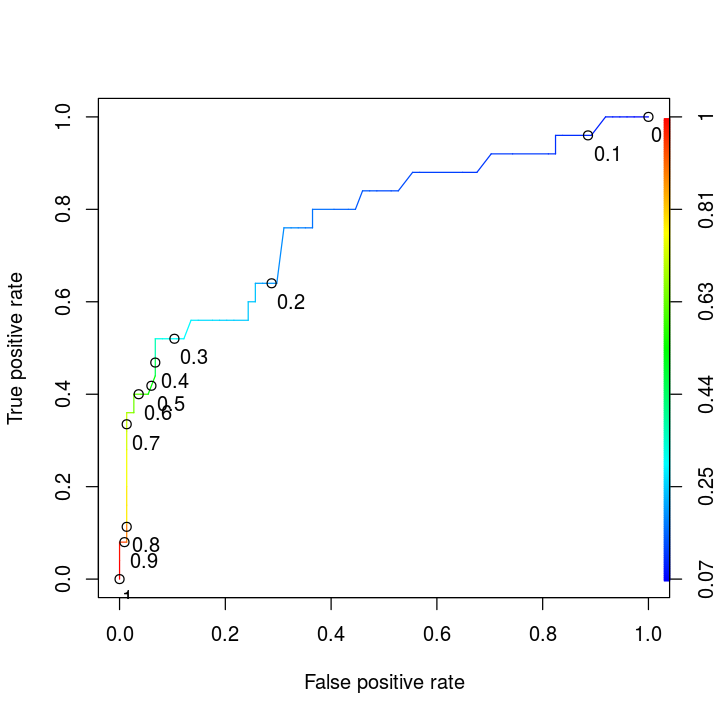

In [34]:
ROCRpred = prediction(predictTrain, qualityTrain$PoorCare)
ROCRperf = performance(ROCRpred, 'tpr', 'fpr')
options(repr.plot.width=6, repr.plot.height=6)
plot(ROCRperf, colorize=T, print.cutoffs.at=seq(0,1,0.1), text.adj=c(-0.2, 1.7))

In [35]:
predictTest = predict(QualityLog, type='response', newdata=qualityTest)
ROCRpredTest = prediction(predictTest, qualityTest$PoorCare)
auc = as.numeric(performance(ROCRpredTest, 'auc')@y.values)
auc

[1] 0.7994792